**Video dataset - Yoga Pose Recognition Source**

**Basic Statistics**

In [ ]:
# Import the required library and define the video path
import cv2

video_path = "yoga_3_pose.mp4"
video = cv2.VideoCapture(video_path)

# Extract basic statistics
fallback_fps = 30.0
video_length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video_fps = video.get(cv2.CAP_PROP_FPS)
video_fps = video_fps if video_fps != 0 else fallback_fps
video_duration = video_length / video_fps
video_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
video_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_resolution = (video_width, video_height)

video_length, video_fps, video_duration, video_resolution


(915, 30.00030000300003, 30.499695, (1088, 1088))

**Visual Inspection**

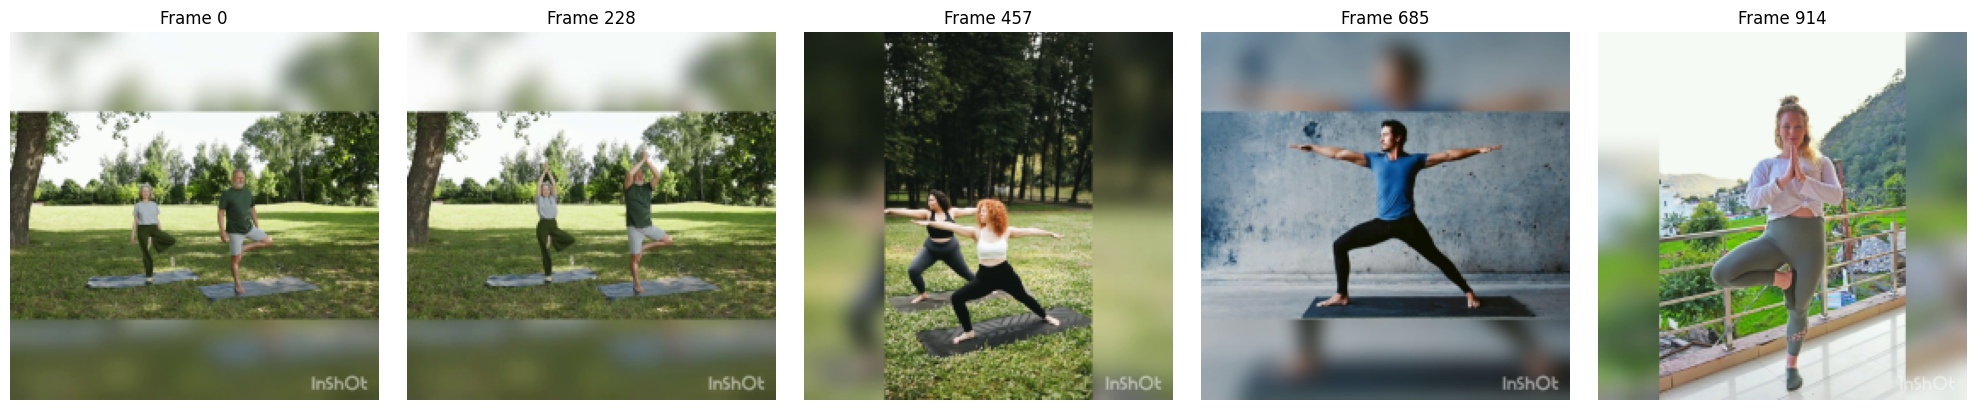

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the video file (assuming you've uploaded 'yoga_3_pose.mp4' to Colab)
video_path = "yoga_3_pose.mp4"
video = cv2.VideoCapture(video_path)

# Extract basic statistics
video_length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video_fps = video.get(cv2.CAP_PROP_FPS)
video_fps = video_fps if video_fps != 0 else 30.0  # Fallback to 30fps if fps is zero
video_duration = video_length / video_fps
video_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
video_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_resolution = (video_width, video_height)

# Define resize dimensions for visualization
resize_factor = 0.2
resize_dim = (int(video_width * resize_factor), int(video_height * resize_factor))

# Randomly select 5 frames for visualization
random_frames = np.linspace(0, video_length-1, 5, dtype=int)

# Extract and display the frames with reduced resolution
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, frame_number in enumerate(random_frames):
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = video.read()
    if ret:
        resized_frame = cv2.resize(frame, resize_dim, interpolation=cv2.INTER_AREA)
        axes[i].imshow(cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Frame {frame_number}")
        axes[i].axis("off")

plt.tight_layout()
plt.show()


**Temporal Analysis - Motion Analysis**

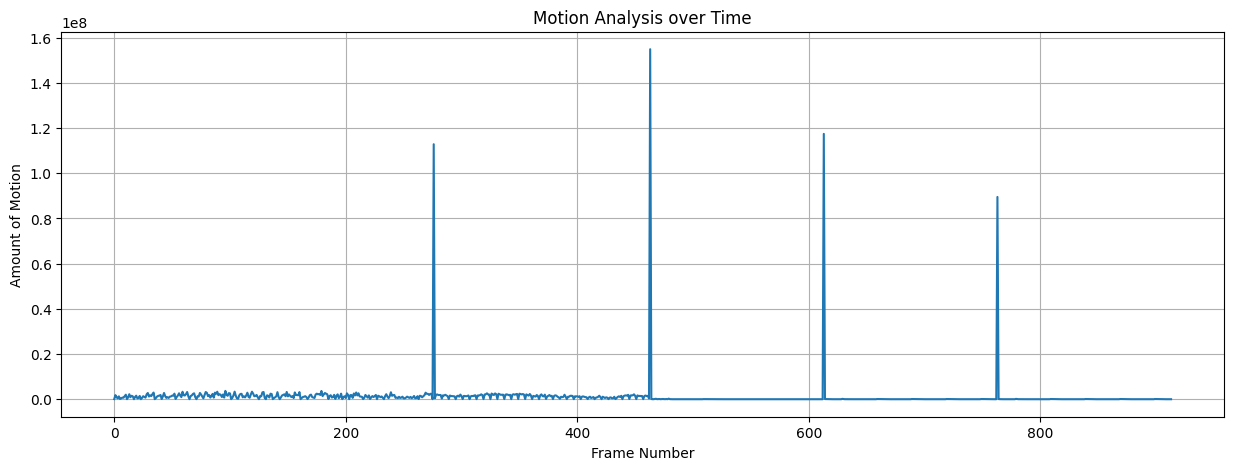

In [ ]:
# Calculate motion between consecutive frames
motion = []
video.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Set video to the first frame

_, prev_frame = video.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

for i in range(1, video_length):
    ret, frame = video.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(prev_gray, gray)
    motion_value = np.sum(diff)
    motion.append(motion_value)
    prev_gray = gray

# Plot the motion
plt.figure(figsize=(15, 5))
plt.plot(motion)
plt.title("Motion Analysis over Time")
plt.xlabel("Frame Number")
plt.ylabel("Amount of Motion")
plt.grid(True)
plt.show()

**Scene Change Detection**

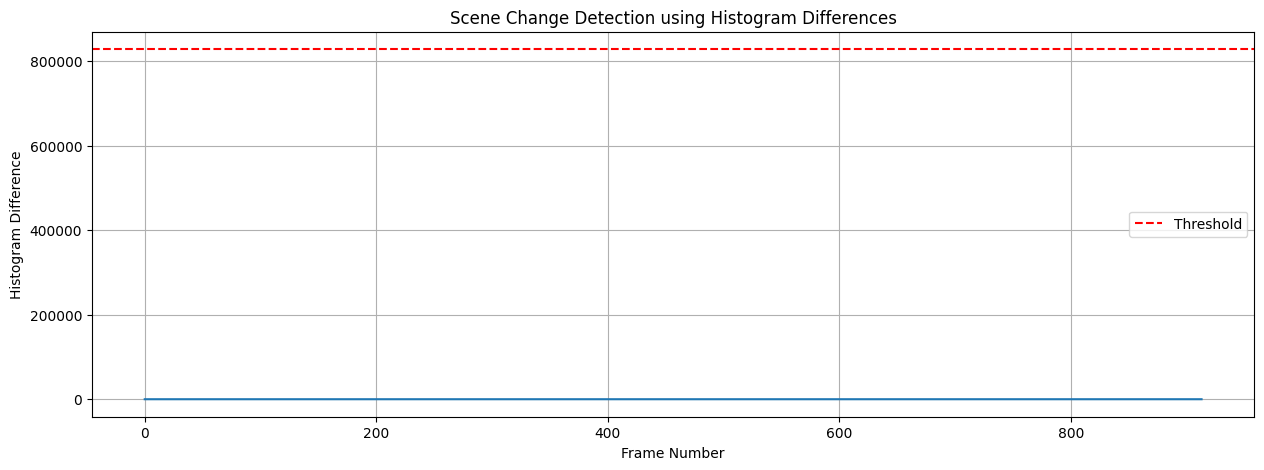

[]

In [ ]:
# Calculate histogram differences between consecutive frames to detect scene changes
hist_diff = []
threshold = 0.7 * video_width * video_height  # Setting a threshold based on frame size
scene_changes = []

video.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset video to the first frame

_, prev_frame = video.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
prev_hist = cv2.calcHist([prev_gray], [0], None, [256], [0, 256])

for i in range(1, video_length):
    ret, frame = video.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_BHATTACHARYYA)
    hist_diff.append(diff)

    if diff > threshold:
        scene_changes.append(i)

    prev_hist = hist

# Plot the histogram differences
plt.figure(figsize=(15, 5))
plt.plot(hist_diff)
plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold")
plt.title("Scene Change Detection using Histogram Differences")
plt.xlabel("Frame Number")
plt.ylabel("Histogram Difference")
plt.legend()
plt.grid(True)
plt.show()

scene_changes

**Frame Colors Over Time & Brightness Over Time**

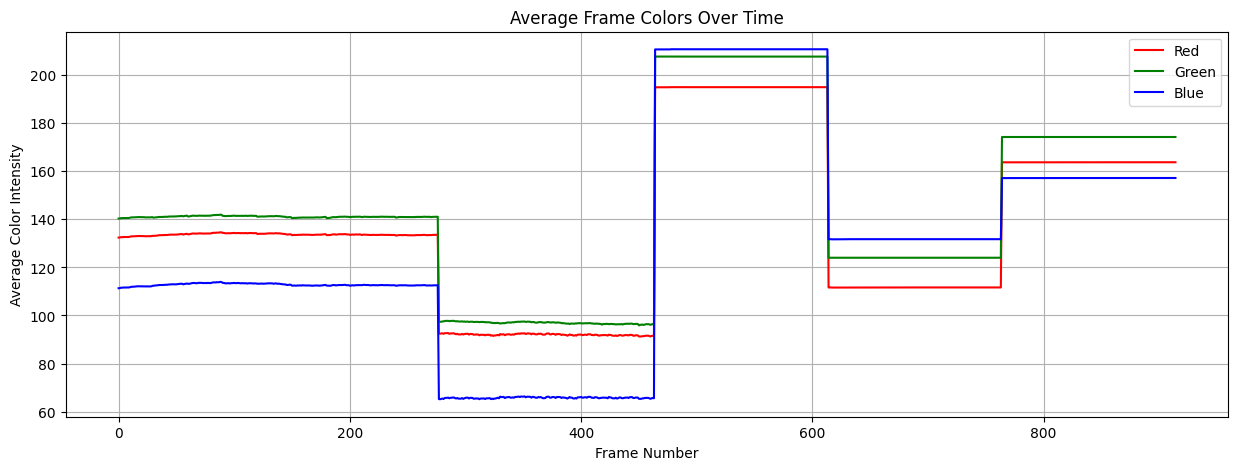

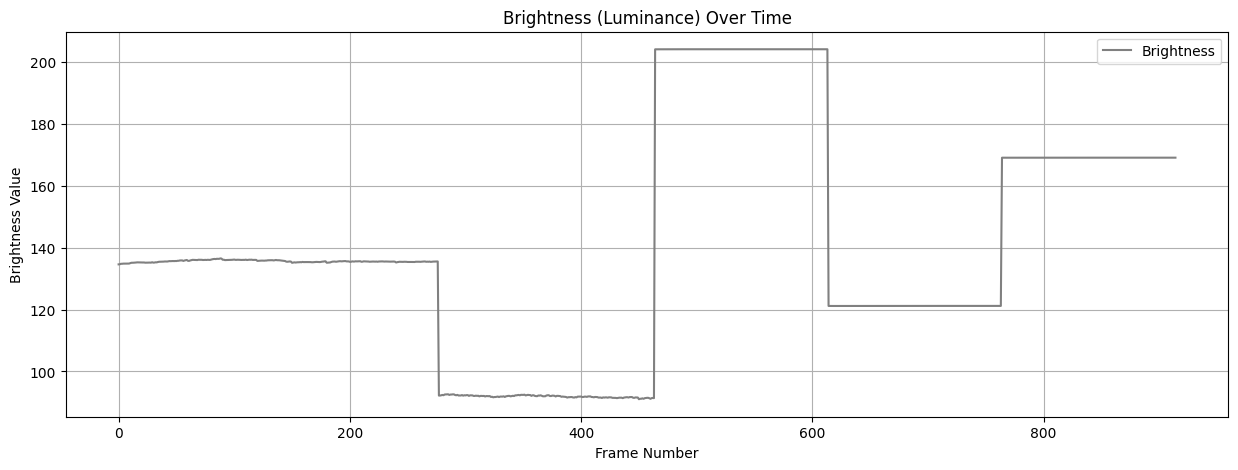

In [ ]:
# Initialize lists to store average RGB values and brightness over time
avg_red = []
avg_green = []
avg_blue = []
brightness = []

video.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset video to the first frame

for _ in range(video_length):
    ret, frame = video.read()
    if not ret:
        break

    # Compute average RGB values for the frame
    avg_red.append(np.mean(frame[:, :, 2]))
    avg_green.append(np.mean(frame[:, :, 1]))
    avg_blue.append(np.mean(frame[:, :, 0]))

    # Compute brightness (luminance) using the formula
    luminance = 0.299 * avg_red[-1] + 0.587 * avg_green[-1] + 0.114 * avg_blue[-1]
    brightness.append(luminance)

# Plot average RGB values over time
plt.figure(figsize=(15, 5))
plt.plot(avg_red, label="Red", color="red")
plt.plot(avg_green, label="Green", color="green")
plt.plot(avg_blue, label="Blue", color="blue")
plt.title("Average Frame Colors Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Average Color Intensity")
plt.legend()
plt.grid(True)
plt.show()

# Plot brightness over time
plt.figure(figsize=(15, 5))
plt.plot(brightness, label="Brightness", color="gray")
plt.title("Brightness (Luminance) Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Brightness Value")
plt.legend()
plt.grid(True)
plt.show()

**Feature Engineering**

In [ ]:
# Initialize lists to store the features
frame_diffs = []
avg_reds = []
avg_greens = []
avg_blues = []
brightness_vals = []

video.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset video to the first frame

_, prev_frame = video.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

for _ in range(1, video_length):
    ret, frame = video.read()
    if not ret:
        break

    # Frame Differencing
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(prev_gray, gray)
    frame_diffs.append(np.mean(diff))
    prev_gray = gray

    # Color Features
    avg_reds.append(np.mean(frame[:, :, 2]))
    avg_greens.append(np.mean(frame[:, :, 1]))
    avg_blues.append(np.mean(frame[:, :, 0]))

    # Brightness Feature
    luminance = 0.299 * avg_reds[-1] + 0.587 * avg_greens[-1] + 0.114 * avg_blues[-1]
    brightness_vals.append(luminance)

# Convert features to a numpy array for further processing
features = np.array([frame_diffs, avg_reds, avg_greens, avg_blues, brightness_vals]).T
features.shape

(914, 5)

**PCA (Principal Component Analysis) & Variance Threshold**

In [ ]:
from sklearn.decomposition import PCA

# Using PCA to reduce dimensionality
pca = PCA(n_components=3)  # Reducing to 3 principal components as an example
principal_components = pca.fit_transform(features)

print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratios: [0.96990484 0.02255475 0.00751177]
Total Variance Explained: 0.9999713641420643


**Data Normalization or Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(principal_components)

**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data without labels
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

**Dimensionality Reduction**

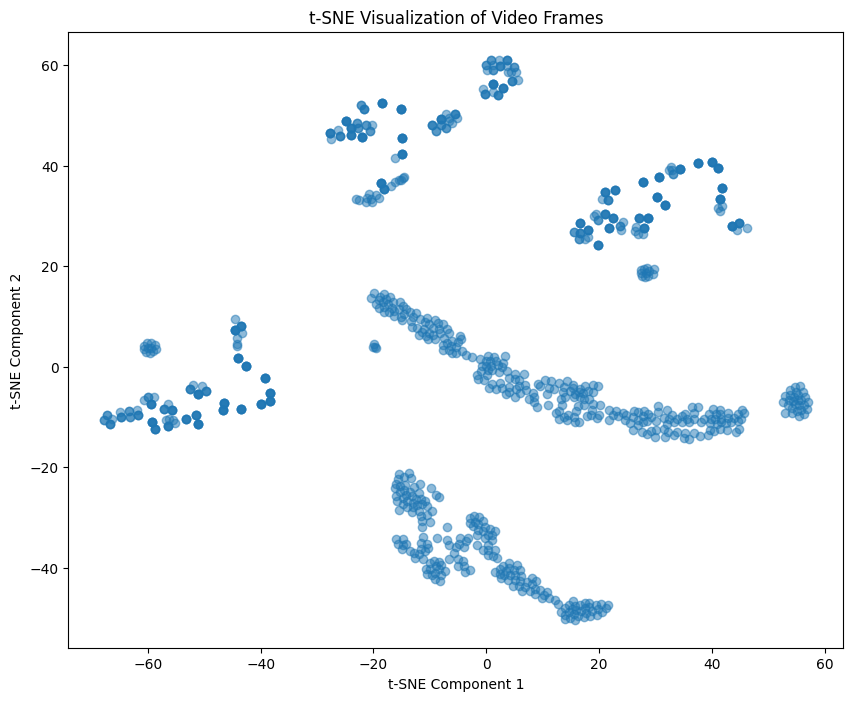

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Video Frames')
plt.show()

**Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

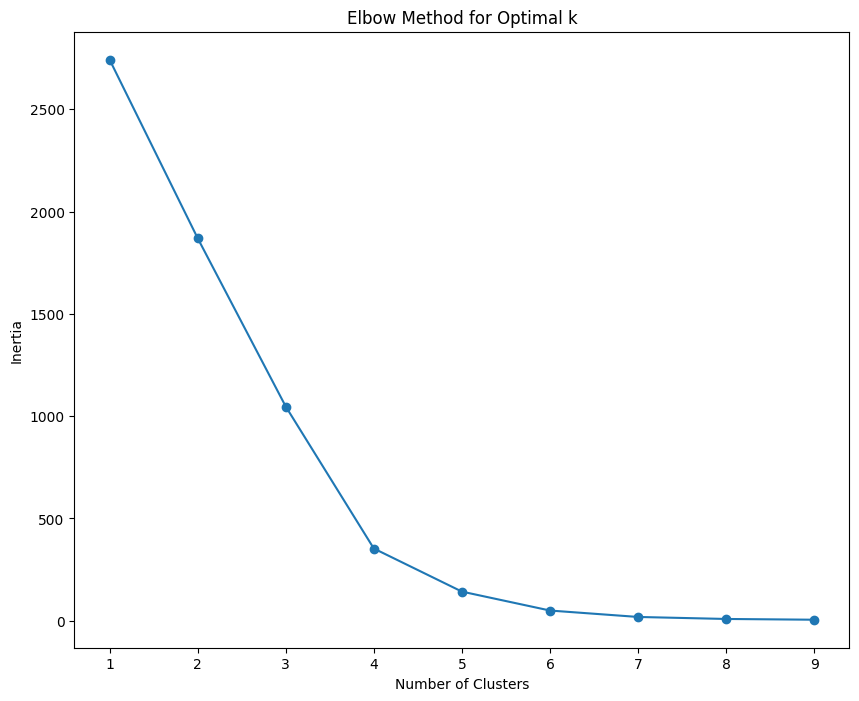

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

**Anomaly Detection**

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(scaled_features)

# 'anomalies' will be a list with -1 indicating an anomaly and 1 indicating a normal data point.

**Feature Learning with Autoencoders**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(scaled_features.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(scaled_features.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 118ms/step - loss: 1.5076 - val_loss: 0.9306
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 1.4954 - val_loss: 0.9241
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 1.4835 - val_loss: 0.9177
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 1.4715 - val_loss: 0.9113
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 1.4596 - val_loss: 0.9048
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 1.4481 - val_loss: 0.8983
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 1.4364 - val_loss: 0.8919
Epoch 8/50
3/3 [==============================] - 0s 20ms/step - loss: 1.4249 - val_loss: 0.8854
Epoch 9/50
3/3 [==============================] - 0s 22ms/step - loss: 1.4136 - val_loss: 0.8790
Epoch 10/50
3/3 [==============================] - 0s 20ms/step - loss: 1.4023 - val_loss: 0.8725
Epoch 11/50
3/3 [===========

**Temporal Modeling**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(scaled_features.shape[1], 1)))
model.add(RepeatVector(scaled_features.shape[1]))  # Repeat the feature vector
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming 'scaled_features' is reshaped to be 3D [samples, timesteps, features]
model.fit(scaled_features, scaled_features, epochs=50, batch_size=64)

Epoch 1/50
15/15 [==============================] - 6s 9ms/step - loss: 0.9923
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.9668
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.9179
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.8467
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.7075
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5433
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5091
Epoch 8/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4967
Epoch 9/50
15/15 [==============================] - 0s 11ms/step - loss: 0.4909
Epoch 10/50
15/15 [==============================] - 0s 11ms/step - loss: 0.4867
Epoch 11/50
15/15 [==============================] - 0s 12ms/step - loss: 0.4734
Epoch 12/50
15/15 [==============================] - 0s 15ms/step - loss: 0.4678
Epoch 13/50
15/15 [=======================

** K-Means clustering on the features**

In [ ]:
from sklearn.cluster import KMeans

# Step 1: Perform K-Means clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Get indices of frames for each cluster
cluster_0_indices = [i for i, label in enumerate(cluster_labels) if label == 0]
cluster_1_indices = [i for i, label in enumerate(cluster_labels) if label == 1]
cluster_2_indices = [i for i, label in enumerate(cluster_labels) if label == 2]

# Sample a few frames from each cluster (let's say 3 frames for demonstration)
sample_frames_cluster_0 = cluster_0_indices[:3]
sample_frames_cluster_1 = cluster_1_indices[:3]
sample_frames_cluster_2 = cluster_2_indices[:3]

sample_frames_cluster_0, sample_frames_cluster_1, sample_frames_cluster_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


([0, 1, 2], [614, 615, 616], [276, 463, 613])

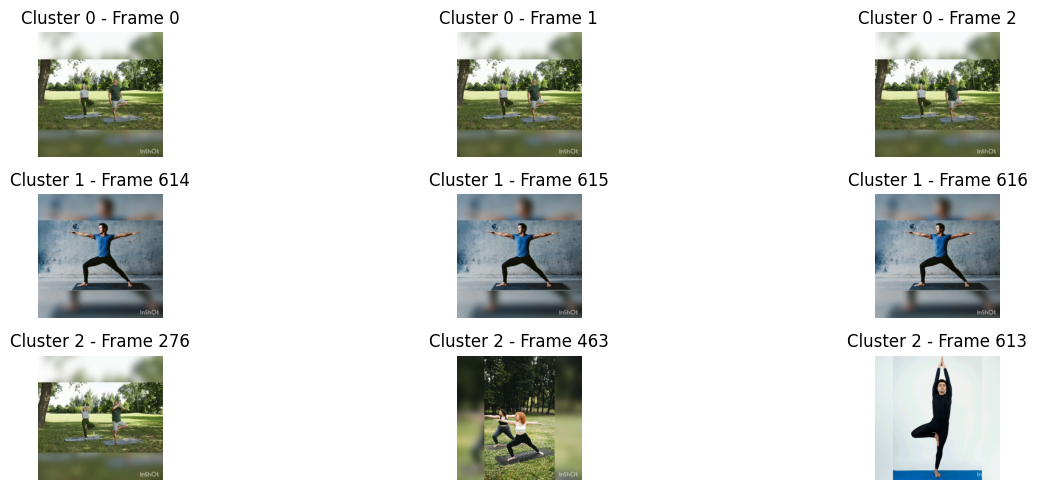

In [ ]:
import cv2
import matplotlib.pyplot as plt

video_path = "yoga_3_pose.mp4"
video = cv2.VideoCapture(video_path)

# Function to get a frame from a video
def get_frame(video, frame_num):
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = video.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame_rgb

# Displaying sampled frames from each cluster
plt.figure(figsize=(15, 5))

# For cluster 0
for i, frame_num in enumerate(sample_frames_cluster_0):
    plt.subplot(3, 3, i+1)
    frame = get_frame(video, frame_num)
    plt.imshow(frame)
    plt.title(f"Cluster 0 - Frame {frame_num}")
    plt.axis('off')

# For cluster 1
for i, frame_num in enumerate(sample_frames_cluster_1):
    plt.subplot(3, 3, i+4)
    frame = get_frame(video, frame_num)
    plt.imshow(frame)
    plt.title(f"Cluster 1 - Frame {frame_num}")
    plt.axis('off')

# For cluster 2
for i, frame_num in enumerate(sample_frames_cluster_2):
    plt.subplot(3, 3, i+7)
    frame = get_frame(video, frame_num)
    plt.imshow(frame)
    plt.title(f"Cluster 2 - Frame {frame_num}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**AutoML with H2O.ai**

**Setup H2O Environment**

In [ ]:
!pip install h2o
import h2o
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=060031df8516ad2d9ab26b4a5eb15c2ef18119bf42caff294426ebd558e3d300
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgrtbhh70
  JVM stdout: /tmp/tmpgrtbhh70/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgrtbhh70/h2o_unknownUser_s

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_orntg0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Data Preparation**

In [ ]:
import cv2
import numpy as np

def extract_features(video_path):
    video = cv2.VideoCapture(video_path)
    brightness = []
    color_mean = []

    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Convert frame to grayscale for brightness
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        brightness.append(np.mean(gray))

        # Extract mean color
        mean_colors = np.mean(frame, axis=(0, 1))
        color_mean.append(mean_colors)

    video.release()
    return brightness, color_mean

video_path = "yoga_3_pose.mp4"
brightness, color_mean = extract_features(video_path)
data = np.column_stack((brightness, color_mean))
labels = np.random.randint(0, 2, len(brightness))
data_with_labels = np.column_stack((data, labels))

**Upload Data to H2O**

In [ ]:
hf = h2o.H2OFrame(data_with_labels)
hf.columns = ["brightness", "color_mean_r", "color_mean_g", "color_mean_b", "label"]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


**Run H2O AutoML**

In [ ]:
from h2o.automl import H2OAutoML

x = hf.columns[:-1]  # All columns except 'label'
y = 'label'

aml = H2OAutoML(max_models=5, seed=42, max_runtime_secs=600)
aml.train(x=x, y=y, training_frame=hf)

AutoML progress: |
22:10:12.546: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
22:10:17.826: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


22:10:18.885: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
22:10:21.250: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
22:10:26.663: _response param, We have d

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20231031_221011


GLM Model: summary
    family    link      regularization             lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.1432 )  nlambda = 30, lambda.max = 4.0193, lambda.min = 0.1432, lambda.1se = 4.0193  4                             4                              8                       AutoML_1_20231031_221011_training_py_1_sid_a92c

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.2477863860433508
RMSE: 0.49778146414199753
MAE: 0.49584391376191694
RMSLE: 0.3498721129154585
Mean Residual Deviance: 0.2477863860433508
R^2: 0.006660679477771048
Null degrees of freedom: 914
Residual degrees of freedom: 910
Null deviance: 228.2448087431693
Residual deviance: 226.72454322966598
AIC: 1332.0602664759062

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.24830004943685
RMSE: 0.4982971497378346
MAE: 0.4963519793214512
RMSLE: 0.3501999122718617
Mean Residual Deviance: 0.24830004943685
R^2: 0.004601478185790597
Null degrees of freedom: 914
Residual degrees of freedom: 910
Null deviance: 228.29030054644772
Residual deviance: 227.19454523471774
AIC: 1333.9551063239774

Cross-Validation Metrics Summary: 
                        mean        sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.496399    0.00218562  0.495083      0.498143      0.496985      0.498489      0.493297
mean_residual_deviance  0.24782     0.00190023  0.247236      0.248994      0.248646      0.249461      0.244762
mse                     0.24782     0.00190023  0.247236      0.248994      0.248646      0.249461      0.244762
null_deviance           45.6581     0.0948806   45.6397       45.597        45.8046       45.6885       45.5605
r2                      0.00618049  0.00645547  0.00865847    0.000414339   0.00514875    0.000694918   0.015986
residual_deviance       45.351      0.347742    45.2442       45.5658       45.5022       45.6513       44.7915
rmse                    0.497812    0.00191155  0.497228      0.498993      0.498644      0.49946       0.494734
rmsle                   0.349921    0.00246273  0.349373      0.34978       0.35261       0.351634      0.346209

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    deviance_xval    deviance_se    alpha    iterations    training_rmse        training_deviance    training_mae         training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  ---------------  -------------  -------  ------------  -------------------  -------------------  -------------------  --------------------
    2023-10-31 22:10:18  0.000 sec   1            4         5             0.248358          0.248635         0.000400263    0
    2023-10-31 22:10:18  0.001 sec   2            2.5       5             0.248198          0.248498         0.000484547    0
    2023-10-31 22:10:18  0.002 sec   3            1.6       5             0.248083          0.248405         0.000573356    0
    2023-10-31 22:10:18  0.003 sec   4            0.96      5             0.248004          0.248353         0.000655731    0
    2023-10-31 22:10:18  0.004 sec   5            0.6       5             0.247946          0.248327         0.000723701    0
    2023-10-31 22:10:18  0.005 sec   6   

**Evaluate the Model**

In [ ]:
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
GLM_1_AutoML_1_20231031_221011                           0.498297  0.2483    0.496352  0.3502                    0.2483
GBM_1_AutoML_1_20231031_221011                           0.499673  0.249673  0.49673   0.351131                  0.249673
StackedEnsemble_BestOfFamily_1_AutoML_1_20231031_221011  0.500047  0.250047  0.499429  0.351427                  0.250047
StackedEnsemble_AllModels_1_AutoML_1_20231031_221011     0.500695  0.250695  0.500005  0.35183                   0.250695
DRF_1_AutoML_1_20231031_221011                           0.50551   0.25554   0.497926  0.354498                  0.25554
XGBoost_1_AutoML_1_20231031_221011                       0.542965  0.294811  0.49487   0.378919                  0.294811
XGBoost_2_AutoML_1_20231031_221011                       0.566394  0.320803  0.504131  0.392444                  0.320803
[7 rows x 6 columns]

